In [1]:
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Explolatory Data Analysis
- Feature Engeenering/Preprocessing Data
- Build Model
- Optimisasi Model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [21]:
# Category
df.groupby(['sex'], as_index=False)['survived'].mean()

,sex,survived
0,female,0.742038
1,male,0.188908


In [13]:
# Category
df.groupby(['embarked'], as_index=False)['survived'].mean()

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
# Category
df.groupby(['pclass'], as_index=False)['survived'].mean()

,pclass,survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
# Category
df.groupby(['who'], as_index=False)['survived'].mean()

,who,survived
0,child,0.590361
1,man,0.163873
2,woman,0.756458


In [16]:
# Category
df.groupby(['embark_town'], as_index=False)['survived'].mean()

,embark_town,survived
0,Cherbourg,0.553571
1,Queenstown,0.389610
2,Southampton,0.336957


In [18]:
# Category
df.groupby(['alive'], as_index=False)['survived'].mean()

,alive,survived
0,no,0
1,yes,1


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df_survived = df[df['survived']==1]
df_non_survived = df[df['survived']==0]

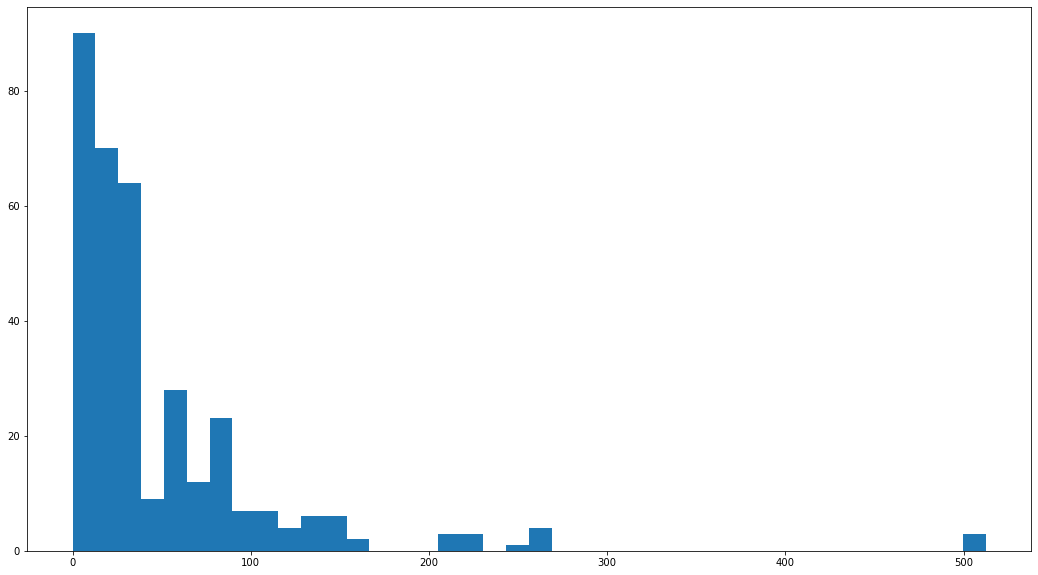

In [36]:
plt.figure(figsize=(18, 10))
plt.hist(df_survived['fare'], label='Distribusi Fare untuk orang survived', bins=40)
plt.show()

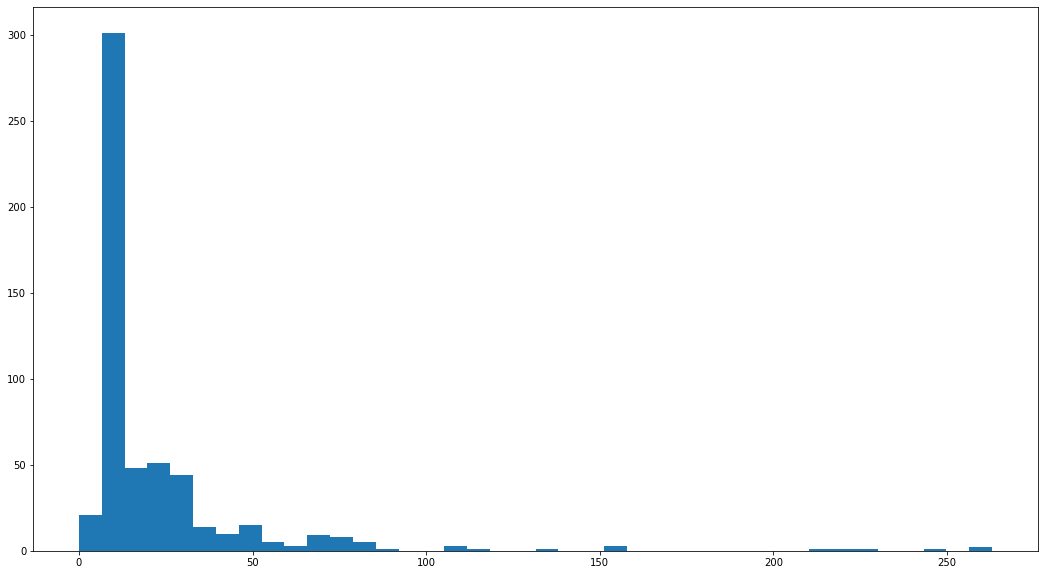

In [37]:
plt.figure(figsize=(18, 10))
plt.hist(df_non_survived['fare'], label='Distribusi Fare untuk orang survived', bins=40)
plt.show()

In [ ]:
- Baseline Model

In [39]:
!pip install sklearn

^C


In [38]:
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'sklearn'

In [42]:
(df.isnull().sum()/df.shape[0])*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [46]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

In [48]:
df.groupby(['deck'], as_index=False)['survived'].mean()

,deck,survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000


In [ ]:
- Dropping deck column

In [49]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


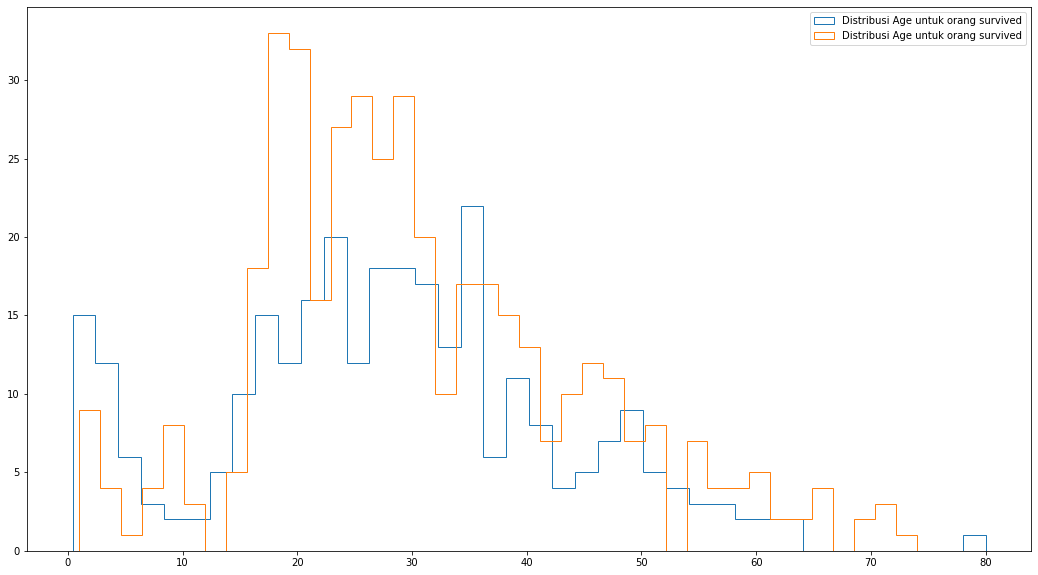

In [53]:
plt.figure(figsize=(18, 10))
plt.hist(df_survived['age'], label='Distribusi Age untuk orang survived', bins=40, histtype='step')
plt.hist(df_non_survived['age'], label='Distribusi Age untuk orang survived', bins=40, histtype='step')
plt.legend()
plt.show()

In [63]:
df['survived'].value_counts()/df.shape[0]

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [ ]:
0-20, 20-40, 40-60, 60-80

In [119]:
df.drop('deck', axis=1, inplace=True)

In [80]:
np.mean(df['age'])

29.69911764705882

In [118]:
df['age'] = df['age'].fillna(np.mean(df['age']))

In [89]:
np.mod(df['embarked'])

TypeError: ufunc() missing 1 of 2required positional argument(s)

In [93]:
df.describe(include=['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [117]:
df['embarked'] = df['embarked'].fillna('S')
df['embark_town'] = df['embark_town'].fillna('Southampton')

In [120]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [96]:
df_2 = pd.get_dummies(df, drop_first=True)

In [ ]:
plt.figure(figsize=(18, 10))
plt.hist(df_non_survived['age'], label='Distribusi Age untuk orang survived', bins=40)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [121]:
x = df_2.drop('survived', axis=1)
y = df_2['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

In [58]:
RandomForestClassifier?

In [59]:
import numpy as np
np.arange(20, 200, 20)

array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])

In [71]:
param_grid = {'n_estimators':np.arange(20, 200, 20), 'max_depth':[3, 5, 8]}

In [67]:
import pandas as pd

In [102]:
model = RandomForestClassifier(n_jobs=-1)
gcv = GridSearchCV(model, param_grid, scoring='accuracy', cv=4, verbose=True, return_train_score=True)
gcv.fit(x_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   25.6s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [3, 5, 8],
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
             return_train_score=True, scoring='accuracy', verbose=True)

In [105]:
gcv.cv_results_

{'mean_fit_time': array([0.77576667, 0.06849831, 0.10401064, 0.10475379, 0.15509427,
        0.15876657, 0.20052612, 0.24449879, 0.2057513 , 0.04925084,
        0.07314551, 0.10650498, 0.10899705, 0.16400862, 0.16900378,
        0.21499872, 0.23850304, 0.24074733, 0.0410009 , 0.07476616,
        0.10500169, 0.11400419, 0.14625353, 0.15299946, 0.19000089,
        0.23475218, 0.21350104]),
 'std_fit_time': array([1.27149764, 0.00217873, 0.00764313, 0.00216774, 0.01405249,
        0.01586943, 0.01601929, 0.01936924, 0.02466019, 0.01219198,
        0.00568785, 0.00960252, 0.00764898, 0.01253792, 0.02312162,
        0.01328343, 0.01073448, 0.01204844, 0.00309139, 0.01287635,
        0.00636673, 0.00796532, 0.01273411, 0.01164819, 0.00886059,
        0.01325643, 0.0208128 ]),
 'mean_score_time': array([0.02149755, 0.01649964, 0.02224863, 0.02624834, 0.03025419,
        0.03199232, 0.03549474, 0.03750044, 0.04575211, 0.01249844,
        0.01850116, 0.02049798, 0.02550048, 0.03600037, 0.032752

In [106]:
gcv.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [108]:
best_model = gcv.best_estimator_

In [109]:
y_test_predict = best_model.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, y_test_predict)

0.9664804469273743

In [ ]:
- Membinning Column Age
- Mendrop salah satu column embarked

In [122]:
df[['embarked', 'embark_town']]

,embarked,embark_town
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
886,S,Southampton
887,S,Southampton
888,S,Southampton
889,C,Cherbourg


In [123]:
df.drop('embark_town', axis=1, inplace=True)

In [126]:
df['age'] = pd.qcut(df['age'], 4)

In [127]:
df_2 = pd.get_dummies(df, drop_first=True)

In [128]:
x = df_2.drop('survived', axis=1)
y = df_2['survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

In [129]:
param_grid = {'n_estimators':np.arange(20, 200, 20), 'max_depth':[3, 5, 8]}

In [130]:
model = RandomForestClassifier(n_jobs=-1)
gcv = GridSearchCV(model, param_grid, scoring='accuracy', cv=4, verbose=True, return_train_score=True)
gcv.fit(x_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   25.9s finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [3, 5, 8],
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
             return_train_score=True, scoring='accuracy', verbose=True)

In [132]:
gcv.best_score_

1.0

In [133]:
best_model = gcv.best_estimator_

In [134]:
y_test_predict = best_model.predict(x_test)

In [136]:
accuracy_score(y_test, y_test_predict)

1.0

In [137]:
y_test_predict

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [141]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64